<a href="https://colab.research.google.com/github/srivastavask/cvlab-ai/blob/main/lab1/B41_E22CSEU1778_Jahnavi_Nischal/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# task 1

In [ ]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
def apply_transformation(vertices, transformation_matrix):
    """Apply a transformation to a set of vertices."""
    transformed_vertices = np.dot(transformation_matrix, vertices.T).T
    return transformed_vertices

# Define the 2D object: a rectangle
rectangle = np.array([[0, 0], [2, 0], [2, 1], [0, 1], [0, 0]])  # Rectangle vertices
rectangle_homogeneous = np.hstack((rectangle, np.ones((rectangle.shape[0], 1))))  # Convert to homogeneous coordinates

# **1. Translation**
tx, ty = 3, 2  # Translate by (3, 2)
translation_matrix = np.array([
    [1, 0, tx],
    [0, 1, ty],
    [0, 0, 1]
])
translated_rectangle = apply_transformation(rectangle_homogeneous, translation_matrix)

# **2. Scaling**
sx, sy = 2, 1.5  # Scale by (2, 1.5)
scaling_matrix = np.array([
    [sx, 0, 0],
    [0, sy, 0],
    [0, 0, 1]
])
scaled_rectangle = apply_transformation(rectangle_homogeneous, scaling_matrix)

# **3. Rotation**
theta = np.radians(45)  # Rotate by 45 degrees
rotation_matrix = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta), np.cos(theta), 0],
    [0, 0, 1]
])
rotated_rectangle = apply_transformation(rectangle_homogeneous, rotation_matrix)

# **4. Reflection**
reflection_matrix_x = np.array([
    [1, 0, 0],
    [0, -1, 0],
    [0, 0, 1]
])  # Reflection across the x-axis
reflected_rectangle = apply_transformation(rectangle_homogeneous, reflection_matrix_x)

# **5. Shearing**
shx, shy = 1, 0.5  # Shear along x and y axes
shearing_matrix = np.array([
    [1, shx, 0],
    [shy, 1, 0],
    [0, 0, 1]
])
sheared_rectangle = apply_transformation(rectangle_homogeneous, shearing_matrix)


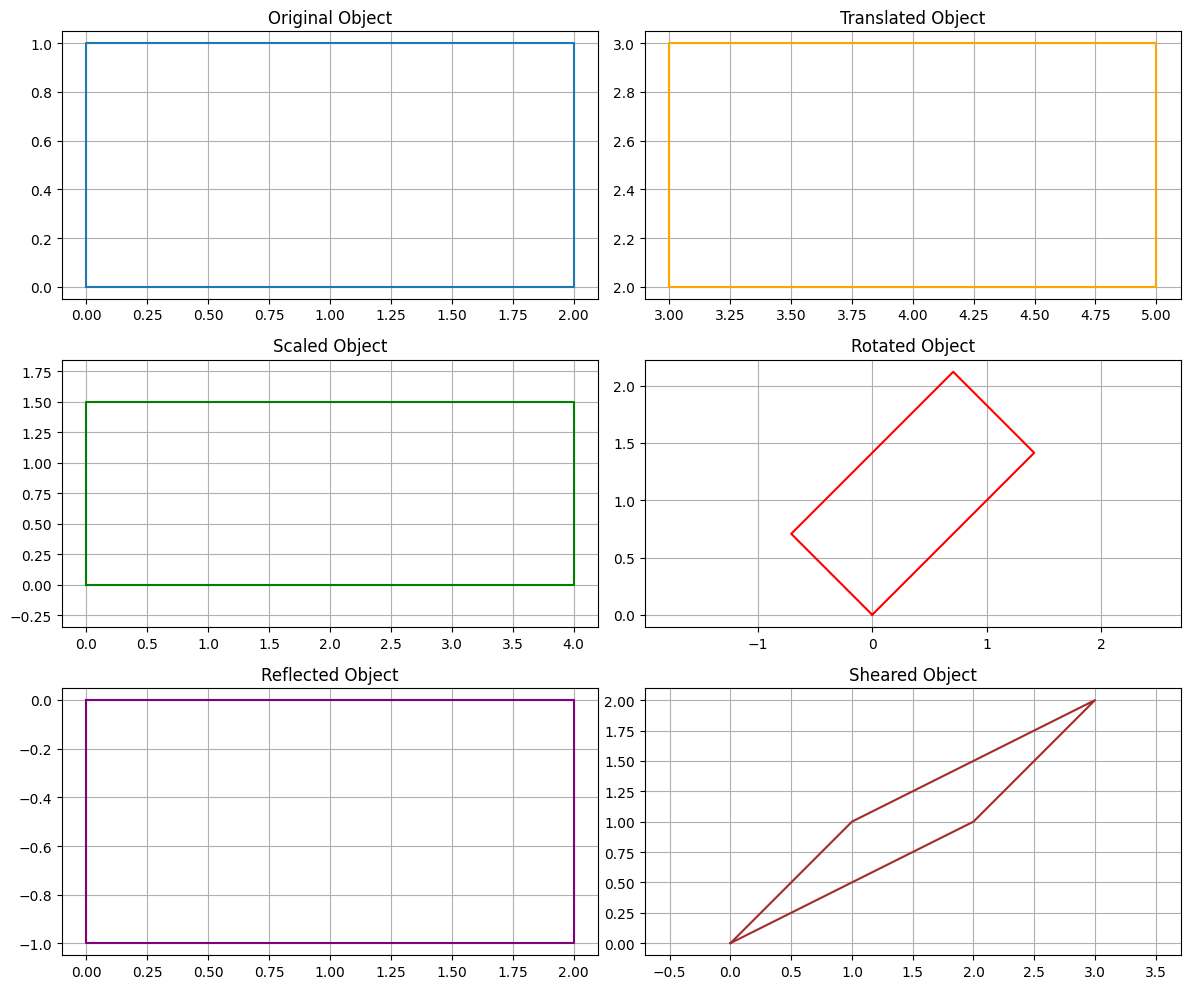

In [ ]:

# **Plot the results**
plt.figure(figsize=(12, 10))

# Original object
plt.subplot(321)
plt.plot(rectangle[:, 0], rectangle[:, 1], label="Original")
plt.title("Original Object")
plt.axis("equal")
plt.grid(True)

# Translated object
plt.subplot(322)
plt.plot(translated_rectangle[:, 0], translated_rectangle[:, 1], label="Translated", color="orange")
plt.title("Translated Object")
plt.axis("equal")
plt.grid(True)

# Scaled object
plt.subplot(323)
plt.plot(scaled_rectangle[:, 0], scaled_rectangle[:, 1], label="Scaled", color="green")
plt.title("Scaled Object")
plt.axis("equal")
plt.grid(True)

# Rotated object
plt.subplot(324)
plt.plot(rotated_rectangle[:, 0], rotated_rectangle[:, 1], label="Rotated", color="red")
plt.title("Rotated Object")
plt.axis("equal")
plt.grid(True)

# Reflected object
plt.subplot(325)
plt.plot(reflected_rectangle[:, 0], reflected_rectangle[:, 1], label="Reflected", color="purple")
plt.title("Reflected Object")
plt.axis("equal")
plt.grid(True)

# Sheared object
plt.subplot(326)
plt.plot(sheared_rectangle[:, 0], sheared_rectangle[:, 1], label="Sheared", color="brown")
plt.title("Sheared Object")
plt.axis("equal")
plt.grid(True)

plt.tight_layout()
plt.show()


# task 2

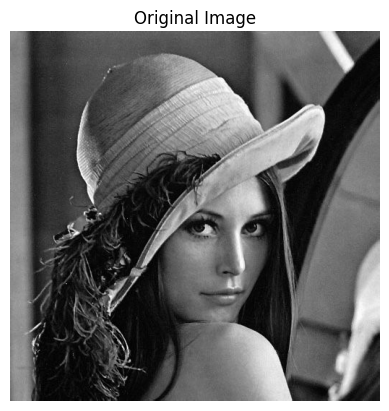

In [ ]:
# Helper function to display an image
def show_image(title, img):
    """Display an image using matplotlib."""
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load an image
image_path = "/content/Picture1.jpg"  # Replace with the path to your image
image = cv2.imread(image_path)

if image is None:
    print("Error: Image not found!")
    exit()

# Display the original image
show_image("Original Image", image)

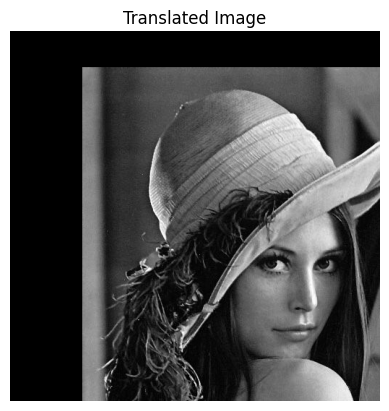

In [ ]:
# **1. Image Translation**
tx, ty = 100, 50  # Translation offsets
translation_matrix = np.array([[1, 0, tx], [0, 1, ty]], dtype=np.float32)
translated_image = cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))
show_image("Translated Image", translated_image)

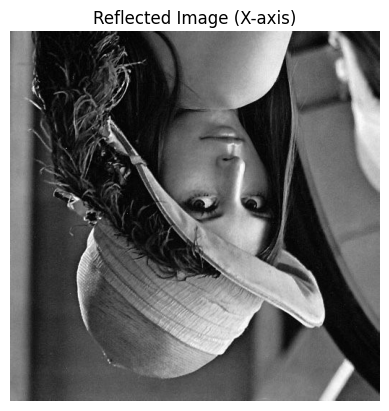

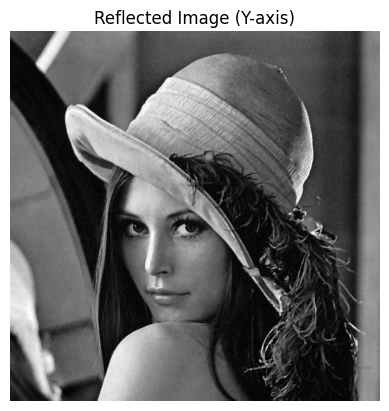

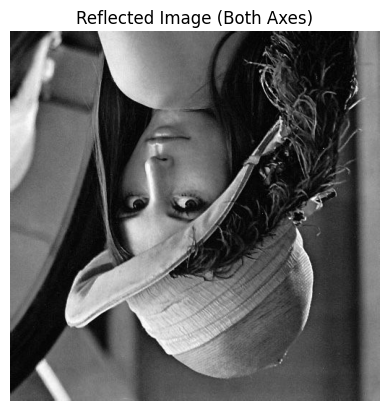

In [ ]:
# **2. Reflection (Flip)**
reflected_image_x = cv2.flip(image, 0)  # Reflection across the x-axis
reflected_image_y = cv2.flip(image, 1)  # Reflection across the y-axis
reflected_image_xy = cv2.flip(image, -1)  # Reflection across both axes
show_image("Reflected Image (X-axis)", reflected_image_x)
show_image("Reflected Image (Y-axis)", reflected_image_y)
show_image("Reflected Image (Both Axes)", reflected_image_xy)

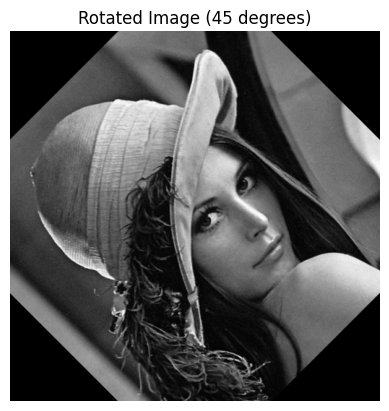

In [ ]:
# **3. Rotation**
angle = 45  # Rotation angle in degrees
center = (image.shape[1] // 2, image.shape[0] // 2)  # Center of rotation
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale=1)
rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))
show_image("Rotated Image (45 degrees)", rotated_image)

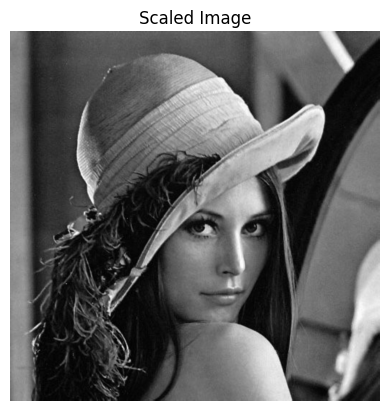

In [ ]:
# **4. Scaling**
scale_x, scale_y = 1.5, 1.5  # Scaling factors
scaled_image = cv2.resize(image, None, fx=scale_x, fy=scale_y, interpolation=cv2.INTER_LINEAR)
show_image("Scaled Image", scaled_image)

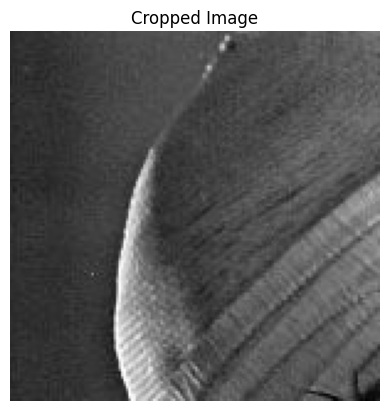

In [ ]:
# **5. Cropping**
crop_start_x, crop_start_y = 50, 50  # Top-left corner of the crop
crop_end_x, crop_end_y = 200, 200  # Bottom-right corner of the crop
cropped_image = image[crop_start_y:crop_end_y, crop_start_x:crop_end_x]
show_image("Cropped Image", cropped_image)

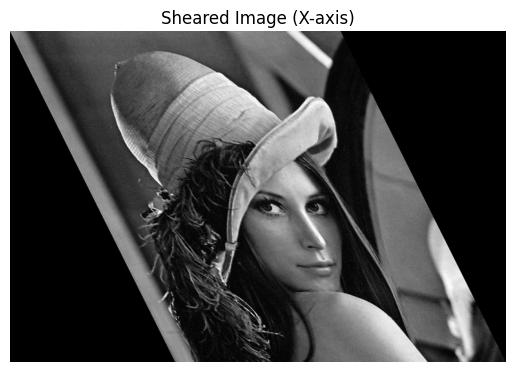

In [ ]:
# **6. Shearing (X-axis)**
shear_x = 0.5  # Shear factor for x-axis
shear_matrix_x = np.array([[1, shear_x, 0], [0, 1, 0]], dtype=np.float32)
sheared_image_x = cv2.warpAffine(image, shear_matrix_x, (int(image.shape[1] + shear_x * image.shape[0]), image.shape[0]))
show_image("Sheared Image (X-axis)", sheared_image_x)

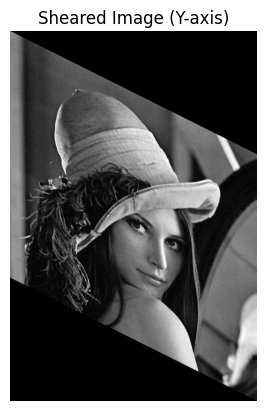

In [ ]:
# **7. Shearing (Y-axis)**
shear_y = 0.5  # Shear factor for y-axis
shear_matrix_y = np.array([[1, 0, 0], [shear_y, 1, 0]], dtype=np.float32)
sheared_image_y = cv2.warpAffine(image, shear_matrix_y, (image.shape[1], int(image.shape[0] + shear_y * image.shape[1])))
show_image("Sheared Image (Y-axis)", sheared_image_y)